Setup

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
!pip install -U scikit-multiflow
#resource for profanity: https://pypi.org/project/profanity-check/
!pip install alt-profanity-check
!pip install sklearn --upgrade
#resource for sentiment: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
!pip install nltk
from profanity_check import predict
import nltk
nltk.download([
"names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib notebook
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.6/450.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.3-cp310-cp310-linux_x86_64.whl size=1254682 sha256=462eacfc372a348a9024f69d6d1fb1a34dd64921c9043d49147ef3069880e3f7
  Stored in directory: /root/.cache/pip/wheels/6e/1b/56/45b17a6cf203d98000a45976cb0dd0c4c3f11960e6a505f231
Successfully built scikit-multiflow
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.4 MB/s eta 0:00:00
  Created wheel for alt-profanity-check: filename=alt_profanity_check-1.3.2-py3-none-any.whl size=1866996 sha256=3f3e650954be2275dbaedc9cb050a60c0774102dbb388d4458212cb1f054292b
  Stored in directory: /root/.cache/pip/wheels/b3/b9/e1/e1ace2573792813935cd59a2f8a0cecc807bd2dbf69327a0b3
Successfully built alt-profanity-check
  Attempting uninstall: sc

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


Dataset Fixing and Modifying

In [2]:
#had to edit first row of csv file so that file was read with 3 columns and not 1
tweets = pd.read_csv("/content/drive/MyDrive/Master's Project/hatespeech_text_label_vote_RESTRICTED_100K_v2.csv")
tweets

,Tweet text Label Votes for the majority label,Unnamed: 1,Unnamed: 2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


In [3]:
#had to fix dataframe column names
tweets = tweets.rename(columns={"Tweet text  Label   Votes for the majority label": "Tweet text", "Unnamed: 1": "Label", "Unnamed: 2": "Votes for the majority label"})
#last column not needed
tweets.drop(tweets.columns[[2]], axis=1, inplace=True)
tweets

,Tweet text,Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [4]:
#"spam" labels not needed
tweets = tweets[tweets['Label'] != "spam"]
tweets

,Tweet text,Label
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [5]:
#check to make sure spam labels dropped
pd.unique(tweets['Label'])

array(['abusive', 'normal', 'hateful'], dtype=object)

Tweet Feature Extraction And Data Cleaning/Processing

In [6]:
tweets["@ count"] = tweets['Tweet text'].str.count('@')
#Remove @'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')

tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
#Remove #'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('#[\S]*','')

tweets['Retweet'] = tweets['Tweet text'].str.contains('RT')
#Remove RT's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('RT', '')

tweets['Url count'] = tweets['Tweet text'].str.count('http[\S]*')
#Remove URL's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('http[\S]*','')

tweets['Uppercase word count'] = tweets['Tweet text'].apply(lambda x: sum(map(str.isupper, x.split())))

tweets['Num sentences'] = tweets['Tweet text'].apply(lambda x: len(nltk.sent_tokenize(x)))

tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.sent_tokenize(x))
tweets['Avg sentence len'] = tweets['temp'].apply(lambda x: pd.Series(x).apply(lambda y: len(nltk.word_tokenize(y))).mean())
tweets.drop(tweets.columns[[8]], axis=1, inplace=True)

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)

<ipython-input-6-c2e6dfa1edf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["@ count"] = tweets['Tweet text'].str.count('@')
<ipython-input-6-c2e6dfa1edf4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-6-c2e6dfa1edf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-6-c2e6dfa1e

In [7]:
sia = SentimentIntensityAnalyzer() #Sentiment is 'compound' value from -1 to 1
tweets['Sentiment'] = tweets['Tweet text'].apply(lambda x: sia.polarity_scores(x)['compound'])

#Create temperorary parts of speech column
from collections import Counter
tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.pos_tag(x.split()))
tweets['temp'] = tweets['temp'].apply(lambda x: Counter(tag for word,tag in x))

#Counting all adjectives
tweets['Adjective count'] = tweets['temp'].apply(lambda x: x['JJ'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJR'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJS'])

#Counting all verbs
tweets['Verb count'] = tweets['temp'].apply(lambda x: x['VB'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBP'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBD'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBG'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBN'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBZ'])

#Counting all adverbs
tweets['Adverb count'] = tweets['temp'].apply(lambda x: x['RB'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBR'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBS'])

#Remove temperoary parts of speech column
tweets.drop(tweets.columns[[10]], axis=1, inplace=True)

#Remove punctuation from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
#Remove numbers from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
#Remove non-letters from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)

tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
tweets['Profanity count'] = tweets['Profanity count'].apply(lambda x: sum(predict(x)))

tweets['Avg word len'] = tweets['Tweet text'].apply(lambda x: sum(list(map(len,x.split()))) / len(x.split()))

<ipython-input-7-5cfc110e5f75>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
<ipython-input-7-5cfc110e5f75>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
<ipython-input-7-5cfc110e5f75>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-7-5cfc110e5f75>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets.drop(tweets.columns[[13]], axis=1, inplace=True)
<ipython-input-7-5cfc110e5f75>:41: SettingWithCopyWarning: 
A value is t

In [8]:
tweets_copy = tweets.copy()
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


A/H Data Preparation For Batch Models

In [9]:
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [10]:
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [11]:
tweets.drop(tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(tweets, "Label")
#'abusive' tweets label = 0
#'hateful' tweets label = 1
#'normal' tweets label = 2
encode_numeric_zscore(tweets, "@ count")
encode_numeric_zscore(tweets, "Hashtag count")
encode_text_dummy(tweets, "Retweet")
encode_numeric_zscore(tweets, "Url count")
encode_numeric_zscore(tweets, "Uppercase word count")
encode_numeric_zscore(tweets, "Num sentences")
encode_numeric_zscore(tweets, "Adjective count")
encode_numeric_zscore(tweets, "Verb count")
encode_numeric_zscore(tweets, "Adverb count")
encode_numeric_zscore(tweets, "Profanity count")
tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.627338,16.0,0.1280,-0.067988,0.163446,-0.696501,0.327584,4.266667,0,1
2,2,-0.700879,0.862444,0.558705,-0.008264,-0.627338,20.0,0.0000,-0.965360,0.695128,2.521878,-0.712615,3.294118,1,0
3,2,-0.700879,-0.392741,-1.026551,-0.402188,-0.627338,35.0,0.0000,3.521502,2.821852,-0.696501,-0.712615,3.633333,1,0
4,2,-0.700879,-0.392741,0.558705,-0.008264,1.740528,6.0,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,4.714286,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.627338,16.0,-0.8689,-0.965360,-0.368235,0.376292,2.407981,4.785714,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.627338,3.0,0.0000,-0.965360,-1.431597,-0.696501,0.327584,4.666667,0,1
99992,2,-0.700879,1.490037,2.143961,-0.402188,-0.627338,7.0,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,5.200000,1,0
99993,2,0.220582,2.117630,-1.026551,-0.402188,-0.627338,29.0,-0.9430,2.624130,0.695128,1.449085,0.327584,3.576923,1,0
99994,2,-0.700879,1.490037,2.143961,-0.402188,-0.627338,8.0,0.0000,-0.965360,-1.431597,0.376292,-0.712615,4.428571,1,0


A/H Batch Model Creation

In [12]:
#split into 10 days of data based on original data collection time frame
tweets_10_day_split = np.array_split(tweets, 10)
day1_tweets = tweets_10_day_split[0]
day2_tweets = tweets_10_day_split[1]
day3_tweets = tweets_10_day_split[2]
day4_tweets = tweets_10_day_split[3]
day5_tweets = tweets_10_day_split[4]
day6_tweets = tweets_10_day_split[5]
day7_tweets = tweets_10_day_split[6]
day8_tweets = tweets_10_day_split[7]
day9_tweets = tweets_10_day_split[8]
day10_tweets = tweets_10_day_split[9]

In [13]:
from collections.abc import Sequence
# Split into train/test
from sklearn.model_selection import train_test_split
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

A/H Decision Tree

In [14]:
#day 1 tweets
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
x_day1,y_day1 = to_xy(day1_tweets,'Label')
x_train_day1, x_test_day1, y_train_day1, y_test_day1 = train_test_split(x_day1, y_day1, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day1, y_train_day1)
pred = clf.predict(x_test_day1)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day1,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       778
           1       0.13      0.14      0.13       160
           2       0.90      0.88      0.89      1635

    accuracy                           0.80      2573
   macro avg       0.59      0.59      0.59      2573
weighted avg       0.80      0.80      0.80      2573



In [15]:
#day 2 tweets
x_day2,y_day2 = to_xy(day2_tweets,'Label')
x_train_day2, x_test_day2, y_train_day2, y_test_day2 = train_test_split(x_day2, y_day2, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day2, y_train_day2)
pred = clf.predict(x_test_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       802
           1       0.10      0.10      0.10       165
           2       0.88      0.87      0.88      1606

    accuracy                           0.79      2573
   macro avg       0.58      0.58      0.58      2573
weighted avg       0.79      0.79      0.79      2573



In [16]:
#day 3 tweets
x_day3,y_day3 = to_xy(day3_tweets,'Label')
x_train_day3, x_test_day3, y_train_day3, y_test_day3 = train_test_split(x_day3, y_day3, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day3, y_train_day3)
pred = clf.predict(x_test_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day3,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       852
           1       0.13      0.14      0.13       137
           2       0.89      0.89      0.89      1584

    accuracy                           0.81      2573
   macro avg       0.60      0.60      0.60      2573
weighted avg       0.81      0.81      0.81      2573



In [17]:
#day 4 tweets
x_day4,y_day4 = to_xy(day4_tweets,'Label')
x_train_day4, x_test_day4, y_train_day4, y_test_day4 = train_test_split(x_day4, y_day4, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day4, y_train_day4)
pred = clf.predict(x_test_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       868
           1       0.14      0.15      0.14       136
           2       0.91      0.90      0.90      1569

    accuracy                           0.83      2573
   macro avg       0.61      0.62      0.61      2573
weighted avg       0.83      0.83      0.83      2573



In [18]:
#day 5 tweets
x_day5,y_day5 = to_xy(day5_tweets,'Label')
x_train_day5, x_test_day5, y_train_day5, y_test_day5 = train_test_split(x_day5, y_day5, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day5, y_train_day5)
pred = clf.predict(x_test_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day5,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       860
           1       0.14      0.16      0.15       152
           2       0.90      0.91      0.90      1561

    accuracy                           0.81      2573
   macro avg       0.61      0.61      0.61      2573
weighted avg       0.82      0.81      0.81      2573



In [19]:
#day 6 tweets
x_day6,y_day6 = to_xy(day6_tweets,'Label')
x_train_day6, x_test_day6, y_train_day6, y_test_day6 = train_test_split(x_day6, y_day6, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day6, y_train_day6)
pred = clf.predict(x_test_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       851
           1       0.12      0.16      0.14       123
           2       0.90      0.87      0.89      1599

    accuracy                           0.81      2573
   macro avg       0.60      0.61      0.60      2573
weighted avg       0.82      0.81      0.82      2573



In [20]:
#day 7 tweets
x_day7,y_day7 = to_xy(day7_tweets,'Label')
x_train_day7, x_test_day7, y_train_day7, y_test_day7 = train_test_split(x_day7, y_day7, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day7, y_train_day7)
pred = clf.predict(x_test_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day7,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       793
           1       0.13      0.14      0.14       145
           2       0.90      0.88      0.89      1635

    accuracy                           0.80      2573
   macro avg       0.59      0.59      0.59      2573
weighted avg       0.80      0.80      0.80      2573



In [21]:
#day 8 tweets
x_day8,y_day8 = to_xy(day8_tweets,'Label')
x_train_day8, x_test_day8, y_train_day8, y_test_day8 = train_test_split(x_day8, y_day8, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day8, y_train_day8)
pred = clf.predict(x_test_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       798
           1       0.21      0.20      0.21       172
           2       0.91      0.91      0.91      1603

    accuracy                           0.82      2573
   macro avg       0.63      0.63      0.63      2573
weighted avg       0.82      0.82      0.82      2573



In [22]:
#day 9 tweets
x_day9,y_day9 = to_xy(day9_tweets,'Label')
x_train_day9, x_test_day9, y_train_day9, y_test_day9 = train_test_split(x_day9, y_day9, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day9, y_train_day9)
pred = clf.predict(x_test_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day9,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       820
           1       0.13      0.15      0.14       151
           2       0.90      0.88      0.89      1602

    accuracy                           0.80      2573
   macro avg       0.60      0.60      0.60      2573
weighted avg       0.81      0.80      0.81      2573



In [23]:
#day 10 tweets
x_day10,y_day10 = to_xy(day10_tweets,'Label')
x_train_day10, x_test_day10, y_train_day10, y_test_day10 = train_test_split(x_day10, y_day10, test_size=0.3, random_state=42)
clf = clf.fit(x_train_day10, y_train_day10)
pred = clf.predict(x_test_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       820
           1       0.15      0.15      0.15       157
           2       0.90      0.88      0.89      1596

    accuracy                           0.81      2573
   macro avg       0.61      0.61      0.61      2573
weighted avg       0.81      0.81      0.81      2573



[[ 662   56  102]
 [  75   23   59]
 [ 119   78 1399]]


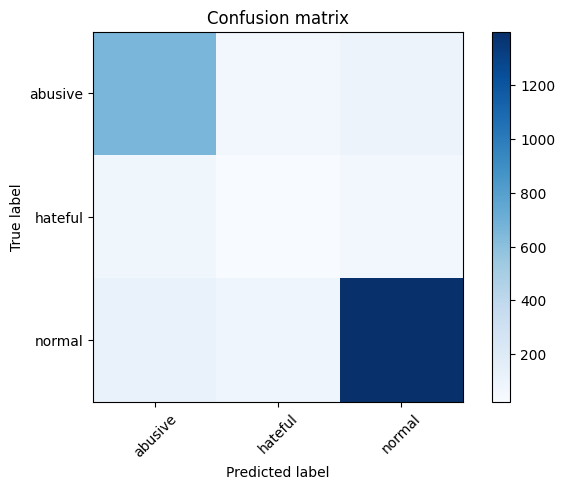

In [24]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

A/H Random Forest

In [25]:
#day 1 tweets
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(verbose = 2, warm_start = True)
rfc = rfc.fit(x_train_day1, y_train_day1)
pred = rfc.predict(x_test_day1)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day1,axis=1)
print(metrics.classification_report(y_true, pred))

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [26]:
#day 2 tweets
rfc = rfc.fit(x_train_day2, y_train_day2)
pred = rfc.predict(x_test_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day2,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.76      0.92      0.83       802
           1       0.38      0.02      0.03       165
           2       0.92      0.91      0.92      1606

    accuracy                           0.86      2573
   macro avg       0.68      0.62      0.59      2573
weighted avg       0.83      0.86      0.83      2573



In [27]:
#day 3 tweets
rfc = rfc.fit(x_train_day3, y_train_day3)
pred = rfc.predict(x_test_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day3,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       852
           1       0.33      0.02      0.04       137
           2       0.93      0.92      0.92      1584

    accuracy                           0.87      2573
   macro avg       0.68      0.62      0.60      2573
weighted avg       0.85      0.87      0.85      2573



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [28]:
#day 4 tweets
rfc = rfc.fit(x_train_day4, y_train_day4)
pred = rfc.predict(x_test_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day4,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.80      0.93      0.86       868
           1       0.56      0.04      0.07       136
           2       0.94      0.93      0.93      1569

    accuracy                           0.88      2573
   macro avg       0.76      0.63      0.62      2573
weighted avg       0.87      0.88      0.86      2573



In [29]:
#day 5 tweets
rfc = rfc.fit(x_train_day5, y_train_day5)
pred = rfc.predict(x_test_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day5,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       860
           1       0.53      0.07      0.12       152
           2       0.93      0.94      0.94      1561

    accuracy                           0.88      2573
   macro avg       0.76      0.64      0.64      2573
weighted avg       0.87      0.88      0.86      2573



In [30]:
#day 6 tweets
rfc = rfc.fit(x_train_day6, y_train_day6)
pred = rfc.predict(x_test_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day6,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       851
           1       0.50      0.04      0.08       123
           2       0.93      0.93      0.93      1599

    accuracy                           0.88      2573
   macro avg       0.74      0.63      0.62      2573
weighted avg       0.87      0.88      0.86      2573



In [31]:
#day 7 tweets
rfc = rfc.fit(x_train_day7, y_train_day7)
pred = rfc.predict(x_test_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day7,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       793
           1       0.75      0.08      0.15       145
           2       0.94      0.93      0.93      1635

    accuracy                           0.88      2573
   macro avg       0.82      0.65      0.64      2573
weighted avg       0.88      0.88      0.86      2573



In [32]:
#day 8 tweets
rfc = rfc.fit(x_train_day8, y_train_day8)
pred = rfc.predict(x_test_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day8,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.76      0.92      0.83       798
           1       0.64      0.05      0.10       172
           2       0.94      0.93      0.93      1603

    accuracy                           0.87      2573
   macro avg       0.78      0.63      0.62      2573
weighted avg       0.86      0.87      0.85      2573



In [33]:
#day 9 tweets
rfc = rfc.fit(x_train_day9, y_train_day9)
pred = rfc.predict(x_test_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day9,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.79      0.93      0.85       820
           1       0.78      0.05      0.09       151
           2       0.93      0.93      0.93      1602

    accuracy                           0.88      2573
   macro avg       0.83      0.63      0.62      2573
weighted avg       0.88      0.88      0.86      2573



In [34]:
#day 10 tweets
rfc = rfc.fit(x_train_day10, y_train_day10)
pred = rfc.predict(x_test_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test_day10,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       820
           1       0.60      0.06      0.10       157
           2       0.93      0.93      0.93      1596

    accuracy                           0.87      2573
   macro avg       0.77      0.64      0.63      2573
weighted avg       0.86      0.87      0.85      2573



[[ 759    6   55]
 [  98    9   50]
 [ 116    0 1480]]


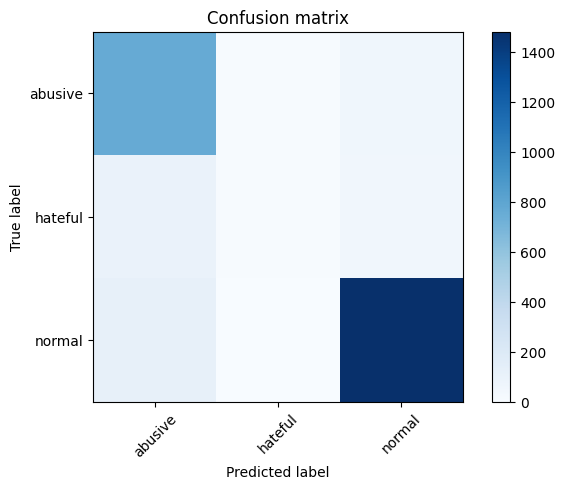

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

A/H Logistic Regression

In [36]:
# day 1 tweets
from sklearn.linear_model import LogisticRegression
x_day1,y_day1 = to_xy(day1_tweets,'Label')
y_day1 = day1_tweets["Label"].values
x_train_day1, x_test_day1, y_train_day1, y_test_day1 = train_test_split(x_day1, y_day1, test_size=0.3, random_state=42)
lr = LogisticRegression(verbose = 2, warm_start = True)
lr = lr.fit(x_train_day1, y_train_day1)
pred = lr.predict(x_test_day1)
print(metrics.classification_report(y_test_day1, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       778
           1       0.00      0.00      0.00       160
           2       0.90      0.95      0.93      1635

    accuracy                           0.87      2573
   macro avg       0.57      0.61      0.59      2573
weighted avg       0.82      0.87      0.84      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#day 2 tweets
x_day2,y_day2 = to_xy(day2_tweets,'Label')
y_day2 = day2_tweets["Label"].values
x_train_day2, x_test_day2, y_train_day2, y_test_day2 = train_test_split(x_day2, y_day2, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day2, y_train_day2)
pred = lr.predict(x_test_day2)
print(metrics.classification_report(y_test_day2, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       802
           1       0.00      0.00      0.00       165
           2       0.89      0.94      0.91      1606

    accuracy                           0.86      2573
   macro avg       0.56      0.60      0.58      2573
weighted avg       0.80      0.86      0.83      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [38]:
#day 3 tweets
x_day3,y_day3 = to_xy(day3_tweets,'Label')
y_day3 = day3_tweets["Label"].values
x_train_day3, x_test_day3, y_train_day3, y_test_day3 = train_test_split(x_day3, y_day3, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day3, y_train_day3)
pred = lr.predict(x_test_day3)
print(metrics.classification_report(y_test_day3, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       852
           1       0.33      0.01      0.01       137
           2       0.90      0.94      0.92      1584

    accuracy                           0.87      2573
   macro avg       0.68      0.61      0.59      2573
weighted avg       0.84      0.87      0.84      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#day 4 tweets
x_day4,y_day4 = to_xy(day4_tweets,'Label')
y_day4 = day4_tweets["Label"].values
x_train_day4, x_test_day4, y_train_day4, y_test_day4 = train_test_split(x_day4, y_day4, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day4, y_train_day4)
pred = lr.predict(x_test_day4)
print(metrics.classification_report(y_test_day4, pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       868
           1       0.00      0.00      0.00       136
           2       0.92      0.94      0.93      1569

    accuracy                           0.88      2573
   macro avg       0.57      0.61      0.59      2573
weighted avg       0.83      0.88      0.85      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [40]:
#day 5 tweets
x_day5,y_day5 = to_xy(day5_tweets,'Label')
y_day5 = day5_tweets["Label"].values
x_train_day5, x_test_day5, y_train_day5, y_test_day5 = train_test_split(x_day5, y_day5, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day5, y_train_day5)
pred = lr.predict(x_test_day5)
print(metrics.classification_report(y_test_day5, pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       860
           1       0.00      0.00      0.00       152
           2       0.91      0.96      0.93      1561

    accuracy                           0.88      2573
   macro avg       0.58      0.61      0.60      2573
weighted avg       0.83      0.88      0.85      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#day 6 tweets
x_day6,y_day6 = to_xy(day6_tweets,'Label')
y_day6 = day6_tweets["Label"].values
x_train_day6, x_test_day6, y_train_day6, y_test_day6 = train_test_split(x_day6, y_day6, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day6, y_train_day6)
pred = lr.predict(x_test_day6)
print(metrics.classification_report(y_test_day6, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       851
           1       0.00      0.00      0.00       123
           2       0.91      0.95      0.93      1599

    accuracy                           0.88      2573
   macro avg       0.58      0.61      0.59      2573
weighted avg       0.84      0.88      0.86      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#day 7 tweets
x_day7,y_day7 = to_xy(day7_tweets,'Label')
y_day7 = day7_tweets["Label"].values
x_train_day7, x_test_day7, y_train_day7, y_test_day7 = train_test_split(x_day7, y_day7, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day7, y_train_day7)
pred = lr.predict(x_test_day7)
print(metrics.classification_report(y_test_day7, pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       793
           1       0.00      0.00      0.00       145
           2       0.92      0.95      0.94      1635

    accuracy                           0.88      2573
   macro avg       0.57      0.61      0.59      2573
weighted avg       0.83      0.88      0.85      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#day 8 tweets
x_day8,y_day8 = to_xy(day8_tweets,'Label')
y_day8 = day8_tweets["Label"].values
x_train_day8, x_test_day8, y_train_day8, y_test_day8 = train_test_split(x_day8, y_day8, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day8, y_train_day8)
pred = lr.predict(x_test_day8)
print(metrics.classification_report(y_test_day8, pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       798
           1       1.00      0.01      0.01       172
           2       0.91      0.95      0.93      1603

    accuracy                           0.86      2573
   macro avg       0.89      0.61      0.59      2573
weighted avg       0.87      0.86      0.83      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#day 9 tweets
x_day9,y_day9 = to_xy(day9_tweets,'Label')
y_day9 = day9_tweets["Label"].values
x_train_day9, x_test_day9, y_train_day9, y_test_day9 = train_test_split(x_day9, y_day9, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day9, y_train_day9)
pred = lr.predict(x_test_day9)
print(metrics.classification_report(y_test_day9, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       820
           1       0.00      0.00      0.00       151
           2       0.91      0.95      0.93      1602

    accuracy                           0.87      2573
   macro avg       0.57      0.61      0.59      2573
weighted avg       0.82      0.87      0.85      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#day 10 tweets
x_day10,y_day10 = to_xy(day10_tweets,'Label')
y_day10 = day10_tweets["Label"].values
x_train_day10, x_test_day10, y_train_day10, y_test_day10 = train_test_split(x_day10, y_day10, test_size=0.3, random_state=42)
lr = lr.fit(x_train_day10, y_train_day10)
pred = lr.predict(x_test_day10)
print(metrics.classification_report(y_test_day10, pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       820
           1       0.00      0.00      0.00       157
           2       0.92      0.95      0.93      1596

    accuracy                           0.88      2573
   macro avg       0.57      0.62      0.59      2573
weighted avg       0.82      0.88      0.85      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 743    1   76]
 [  95    0   62]
 [  85    0 1511]]


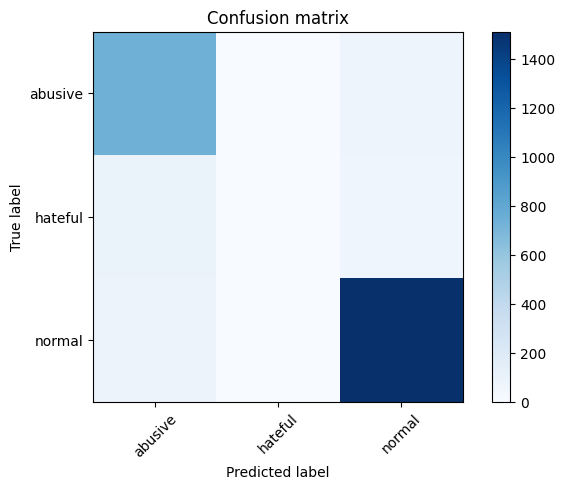

In [46]:
# Compute confusion matrix
cm = confusion_matrix(y_test_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

Aggressive Tweets

In [47]:
#combine abusive and hateful tweets into aggressive for later comparison with other work
aggressive_tweets = tweets_copy
aggressive_tweets = aggressive_tweets.replace("abusive","aggressive")
aggressive_tweets = aggressive_tweets.replace("hateful","aggressive")
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [48]:
#check to make sure only aggressive and normal tweet labels exist
pd.unique(aggressive_tweets['Label'])

array(['aggressive', 'normal'], dtype=object)

Agg Data Preparation For Models

In [49]:
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [50]:
aggressive_tweets.drop(aggressive_tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(aggressive_tweets, "Label")
#'aggressive' tweets label = 0
#'normal' tweets label = 1
encode_numeric_zscore(aggressive_tweets, "@ count")
encode_numeric_zscore(aggressive_tweets, "Hashtag count")
encode_text_dummy(aggressive_tweets, "Retweet")
encode_numeric_zscore(aggressive_tweets, "Url count")
encode_numeric_zscore(aggressive_tweets, "Uppercase word count")
encode_numeric_zscore(aggressive_tweets, "Num sentences")
encode_numeric_zscore(aggressive_tweets, "Adjective count")
encode_numeric_zscore(aggressive_tweets, "Verb count")
encode_numeric_zscore(aggressive_tweets, "Adverb count")
encode_numeric_zscore(aggressive_tweets, "Profanity count")
aggressive_tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.627338,16.0,0.1280,-0.067988,0.163446,-0.696501,0.327584,4.266667,0,1
2,1,-0.700879,0.862444,0.558705,-0.008264,-0.627338,20.0,0.0000,-0.965360,0.695128,2.521878,-0.712615,3.294118,1,0
3,1,-0.700879,-0.392741,-1.026551,-0.402188,-0.627338,35.0,0.0000,3.521502,2.821852,-0.696501,-0.712615,3.633333,1,0
4,1,-0.700879,-0.392741,0.558705,-0.008264,1.740528,6.0,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,4.714286,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.627338,16.0,-0.8689,-0.965360,-0.368235,0.376292,2.407981,4.785714,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.627338,3.0,0.0000,-0.965360,-1.431597,-0.696501,0.327584,4.666667,0,1
99992,1,-0.700879,1.490037,2.143961,-0.402188,-0.627338,7.0,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,5.200000,1,0
99993,1,0.220582,2.117630,-1.026551,-0.402188,-0.627338,29.0,-0.9430,2.624130,0.695128,1.449085,0.327584,3.576923,1,0
99994,1,-0.700879,1.490037,2.143961,-0.402188,-0.627338,8.0,0.0000,-0.965360,-1.431597,0.376292,-0.712615,4.428571,1,0


Aggressive Batch Model Creation

In [51]:
#split into 10 days of data based on original data collection time frame
agg_tweets_10_day_split = np.array_split(aggressive_tweets, 10)
agg_day1_tweets = agg_tweets_10_day_split[0]
agg_day2_tweets = agg_tweets_10_day_split[1]
agg_day3_tweets = agg_tweets_10_day_split[2]
agg_day4_tweets = agg_tweets_10_day_split[3]
agg_day5_tweets = agg_tweets_10_day_split[4]
agg_day6_tweets = agg_tweets_10_day_split[5]
agg_day7_tweets = agg_tweets_10_day_split[6]
agg_day8_tweets = agg_tweets_10_day_split[7]
agg_day9_tweets = agg_tweets_10_day_split[8]
agg_day10_tweets = agg_tweets_10_day_split[9]

Aggressive Decision Tree

In [52]:
#day 1 tweets
agg_dtc = tree.DecisionTreeClassifier()
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_x_train_day1, agg_x_test_day1, agg_y_train_day1, agg_y_test_day1 = train_test_split(agg_x_day1, agg_y_day1, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day1, agg_y_train_day1)
pred = agg_dtc.predict(agg_x_test_day1)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day1,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       938
           1       0.90      0.89      0.90      1635

    accuracy                           0.87      2573
   macro avg       0.86      0.86      0.86      2573
weighted avg       0.87      0.87      0.87      2573



In [53]:
#day 2 tweets
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_x_train_day2, agg_x_test_day2, agg_y_train_day2, agg_y_test_day2 = train_test_split(agg_x_day2, agg_y_day2, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day2, agg_y_train_day2)
pred = agg_dtc.predict(agg_x_test_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day2,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       967
           1       0.89      0.89      0.89      1606

    accuracy                           0.86      2573
   macro avg       0.85      0.85      0.85      2573
weighted avg       0.86      0.86      0.86      2573



In [54]:
#day 3 tweets
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_x_train_day3, agg_x_test_day3, agg_y_train_day3, agg_y_test_day3 = train_test_split(agg_x_day3, agg_y_day3, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day3, agg_y_train_day3)
pred = agg_dtc.predict(agg_x_test_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day3,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       989
           1       0.88      0.89      0.89      1584

    accuracy                           0.86      2573
   macro avg       0.86      0.85      0.85      2573
weighted avg       0.86      0.86      0.86      2573



In [55]:
#day 4 tweets
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_x_train_day4, agg_x_test_day4, agg_y_train_day4, agg_y_test_day4 = train_test_split(agg_x_day4, agg_y_day4, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day4, agg_y_train_day4)
pred = agg_dtc.predict(agg_x_test_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day4,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1004
           1       0.91      0.90      0.90      1569

    accuracy                           0.88      2573
   macro avg       0.87      0.88      0.87      2573
weighted avg       0.88      0.88      0.88      2573



In [56]:
#day 5 tweets
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_x_train_day5, agg_x_test_day5, agg_y_train_day5, agg_y_test_day5 = train_test_split(agg_x_day5, agg_y_day5, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day5, agg_y_train_day5)
pred = agg_dtc.predict(agg_x_test_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day5,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1012
           1       0.89      0.91      0.90      1561

    accuracy                           0.88      2573
   macro avg       0.88      0.87      0.87      2573
weighted avg       0.88      0.88      0.88      2573



In [57]:
#day 6 tweets
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_x_train_day6, agg_x_test_day6, agg_y_train_day6, agg_y_test_day6 = train_test_split(agg_x_day6, agg_y_day6, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day6, agg_y_train_day6)
pred = agg_dtc.predict(agg_x_test_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day6,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       974
           1       0.90      0.88      0.89      1599

    accuracy                           0.86      2573
   macro avg       0.85      0.86      0.86      2573
weighted avg       0.87      0.86      0.86      2573



In [58]:
#day 7 tweets
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_x_train_day7, agg_x_test_day7, agg_y_train_day7, agg_y_test_day7 = train_test_split(agg_x_day7, agg_y_day7, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day7, agg_y_train_day7)
pred = agg_dtc.predict(agg_x_test_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day7,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       938
           1       0.91      0.89      0.90      1635

    accuracy                           0.87      2573
   macro avg       0.86      0.86      0.86      2573
weighted avg       0.87      0.87      0.87      2573



In [59]:
#day 8 tweets
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_x_train_day8, agg_x_test_day8, agg_y_train_day8, agg_y_test_day8 = train_test_split(agg_x_day8, agg_y_day8, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day8, agg_y_train_day8)
pred = agg_dtc.predict(agg_x_test_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day8,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       970
           1       0.90      0.90      0.90      1603

    accuracy                           0.88      2573
   macro avg       0.87      0.87      0.87      2573
weighted avg       0.88      0.88      0.88      2573



In [60]:
#day 9 tweets
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_x_train_day9, agg_x_test_day9, agg_y_train_day9, agg_y_test_day9 = train_test_split(agg_x_day9, agg_y_day9, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day9, agg_y_train_day9)
pred = agg_dtc.predict(agg_x_test_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day9,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       971
           1       0.89      0.88      0.89      1602

    accuracy                           0.86      2573
   macro avg       0.85      0.85      0.85      2573
weighted avg       0.86      0.86      0.86      2573



In [61]:
#day 10 tweets
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_x_train_day10, agg_x_test_day10, agg_y_train_day10, agg_y_test_day10 = train_test_split(agg_x_day10, agg_y_day10, test_size=0.3, random_state=42)
agg_dtc = agg_dtc.fit(agg_x_train_day10, agg_y_train_day10)
pred = agg_dtc.predict(agg_x_test_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day10,axis=1)
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       977
           1       0.90      0.89      0.89      1596

    accuracy                           0.87      2573
   macro avg       0.86      0.86      0.86      2573
weighted avg       0.87      0.87      0.87      2573



[[ 820  157]
 [ 179 1417]]


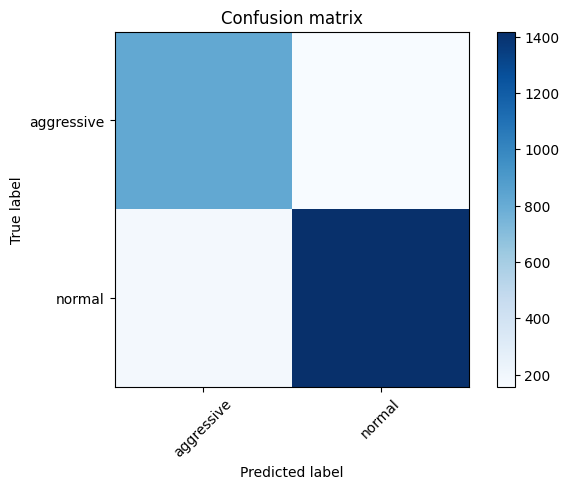

In [62]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

Aggressive Random Forest

In [63]:
#day 1 tweets
agg_rfc = RandomForestClassifier(verbose = 2, warm_start = True)
agg_rfc = agg_rfc.fit(agg_x_train_day1, agg_y_train_day1)
pred = agg_rfc.predict(agg_x_test_day1)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day1,axis=1)
print(metrics.classification_report(y_true, pred))

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [64]:
#day 2 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day2, agg_y_train_day2)
pred = agg_rfc.predict(agg_x_test_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day2,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       967
           1       0.92      0.91      0.92      1606

    accuracy                           0.89      2573
   macro avg       0.89      0.89      0.89      2573
weighted avg       0.89      0.89      0.89      2573



In [65]:
#day 3 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day3, agg_y_train_day3)
pred = agg_rfc.predict(agg_x_test_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day3,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       989
           1       0.92      0.92      0.92      1584

    accuracy                           0.90      2573
   macro avg       0.90      0.90      0.90      2573
weighted avg       0.90      0.90      0.90      2573



In [66]:
#day 4 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day4, agg_y_train_day4)
pred = agg_rfc.predict(agg_x_test_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day4,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1004
           1       0.94      0.93      0.94      1569

    accuracy                           0.92      2573
   macro avg       0.92      0.92      0.92      2573
weighted avg       0.92      0.92      0.92      2573



In [67]:
#day 5 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day5, agg_y_train_day5)
pred = agg_rfc.predict(agg_x_test_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day5,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1012
           1       0.93      0.94      0.94      1561

    accuracy                           0.92      2573
   macro avg       0.92      0.92      0.92      2573
weighted avg       0.92      0.92      0.92      2573



In [68]:
#day 6 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day6, agg_y_train_day6)
pred = agg_rfc.predict(agg_x_test_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day6,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       974
           1       0.93      0.93      0.93      1599

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573



In [69]:
#day 7 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day7, agg_y_train_day7)
pred = agg_rfc.predict(agg_x_test_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day7,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       938
           1       0.94      0.93      0.93      1635

    accuracy                           0.92      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.92      0.92      0.92      2573



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


In [70]:
#day 8 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day8, agg_y_train_day8)
pred = agg_rfc.predict(agg_x_test_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day8,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       970
           1       0.94      0.93      0.93      1603

    accuracy                           0.92      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.92      0.92      0.92      2573



In [71]:
#day 9 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day9, agg_y_train_day9)
pred = agg_rfc.predict(agg_x_test_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day9,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       971
           1       0.93      0.93      0.93      1602

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573



In [72]:
#day 10 tweets
agg_rfc = agg_rfc.fit(agg_x_train_day10, agg_y_train_day10)
pred = agg_rfc.predict(agg_x_test_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_test_day10,axis=1)
print(metrics.classification_report(y_true, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.89      0.89       977
           1       0.93      0.93      0.93      1596

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573



[[ 866  111]
 [ 108 1488]]


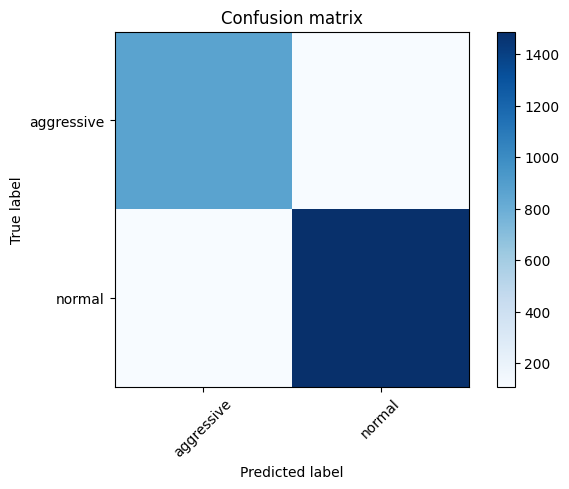

In [73]:
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()

Aggressive Logistic Regression

In [74]:
#day 1 tweets
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_y_day1 = agg_day1_tweets["Label"].values
agg_x_train_day1, agg_x_test_day1, agg_y_train_day1, agg_y_test_day1 = train_test_split(agg_x_day1, agg_y_day1, test_size=0.3, random_state=42)
agg_lr = LogisticRegression(verbose = 2, warm_start = True)
agg_lr = agg_lr.fit(agg_x_train_day1, agg_y_train_day1)
pred = agg_lr.predict(agg_x_test_day1)
print(metrics.classification_report(agg_y_test_day1, pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       938
           1       0.92      0.95      0.94      1635

    accuracy                           0.92      2573
   macro avg       0.91      0.90      0.91      2573
weighted avg       0.92      0.92      0.92      2573



In [75]:
#day 2 tweets
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_y_day2 = agg_day2_tweets["Label"].values
agg_x_train_day2, agg_x_test_day2, agg_y_train_day2, agg_y_test_day2 = train_test_split(agg_x_day2, agg_y_day2, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day2, agg_y_train_day2)
pred = agg_lr.predict(agg_x_test_day2)
print(metrics.classification_report(agg_y_test_day2, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       967
           1       0.90      0.93      0.91      1606

    accuracy                           0.89      2573
   macro avg       0.89      0.88      0.88      2573
weighted avg       0.89      0.89      0.89      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
#day 3 tweets
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_y_day3 = agg_day3_tweets["Label"].values
agg_x_train_day3, agg_x_test_day3, agg_y_train_day3, agg_y_test_day3 = train_test_split(agg_x_day3, agg_y_day3, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day3, agg_y_train_day3)
pred = agg_lr.predict(agg_x_test_day3)
print(metrics.classification_report(agg_y_test_day3, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       989
           1       0.92      0.93      0.92      1584

    accuracy                           0.91      2573
   macro avg       0.90      0.90      0.90      2573
weighted avg       0.91      0.91      0.91      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
#day 4 tweets
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_y_day4 = agg_day4_tweets["Label"].values
agg_x_train_day4, agg_x_test_day4, agg_y_train_day4, agg_y_test_day4 = train_test_split(agg_x_day4, agg_y_day4, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day4, agg_y_train_day4)
pred = agg_lr.predict(agg_x_test_day4)
print(metrics.classification_report(agg_y_test_day4, pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1004
           1       0.93      0.93      0.93      1569

    accuracy                           0.92      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.92      0.92      0.92      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
#day 5 tweets
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_y_day5 = agg_day5_tweets["Label"].values
agg_x_train_day5, agg_x_test_day5, agg_y_train_day5, agg_y_test_day5 = train_test_split(agg_x_day5, agg_y_day5, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day5, agg_y_train_day5)
pred = agg_lr.predict(agg_x_test_day5)
print(metrics.classification_report(agg_y_test_day5, pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1012
           1       0.92      0.95      0.93      1561

    accuracy                           0.92      2573
   macro avg       0.92      0.91      0.91      2573
weighted avg       0.92      0.92      0.92      2573



In [79]:
#day 6 tweets
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_y_day6 = agg_day6_tweets["Label"].values
agg_x_train_day6, agg_x_test_day6, agg_y_train_day6, agg_y_test_day6 = train_test_split(agg_x_day6, agg_y_day6, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day6, agg_y_train_day6)
pred = agg_lr.predict(agg_x_test_day6)
print(metrics.classification_report(agg_y_test_day6, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       974
           1       0.92      0.94      0.93      1599

    accuracy                           0.91      2573
   macro avg       0.91      0.90      0.90      2573
weighted avg       0.91      0.91      0.91      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
#day 7 tweets
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_y_day7 = agg_day7_tweets["Label"].values
agg_x_train_day7, agg_x_test_day7, agg_y_train_day7, agg_y_test_day7 = train_test_split(agg_x_day7, agg_y_day7, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day7, agg_y_train_day7)
pred = agg_lr.predict(agg_x_test_day7)
print(metrics.classification_report(agg_y_test_day7, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       938
           1       0.93      0.93      0.93      1635

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573



In [81]:
#day 8 tweets
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_y_day8 = agg_day8_tweets["Label"].values
agg_x_train_day8, agg_x_test_day8, agg_y_train_day8, agg_y_test_day8 = train_test_split(agg_x_day8, agg_y_day8, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day8, agg_y_train_day8)
pred = agg_lr.predict(agg_x_test_day8)
print(metrics.classification_report(agg_y_test_day8, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       970
           1       0.92      0.94      0.93      1603

    accuracy                           0.91      2573
   macro avg       0.91      0.90      0.91      2573
weighted avg       0.91      0.91      0.91      2573



In [82]:
#day 9 tweets
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_y_day9 = agg_day9_tweets["Label"].values
agg_x_train_day9, agg_x_test_day9, agg_y_train_day9, agg_y_test_day9 = train_test_split(agg_x_day9, agg_y_day9, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day9, agg_y_train_day9)
pred = agg_lr.predict(agg_x_test_day9)
print(metrics.classification_report(agg_y_test_day9, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       971
           1       0.92      0.94      0.93      1602

    accuracy                           0.91      2573
   macro avg       0.91      0.90      0.90      2573
weighted avg       0.91      0.91      0.91      2573



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
#day 10 tweets
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_y_day10 = agg_day10_tweets["Label"].values
agg_x_train_day10, agg_x_test_day10, agg_y_train_day10, agg_y_test_day10 = train_test_split(agg_x_day10, agg_y_day10, test_size=0.3, random_state=42)
agg_lr = agg_lr.fit(agg_x_train_day10, agg_y_train_day10)
pred = agg_lr.predict(agg_x_test_day10)
print(metrics.classification_report(agg_y_test_day10, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       977
           1       0.93      0.93      0.93      1596

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573



[[ 859  118]
 [ 108 1488]]


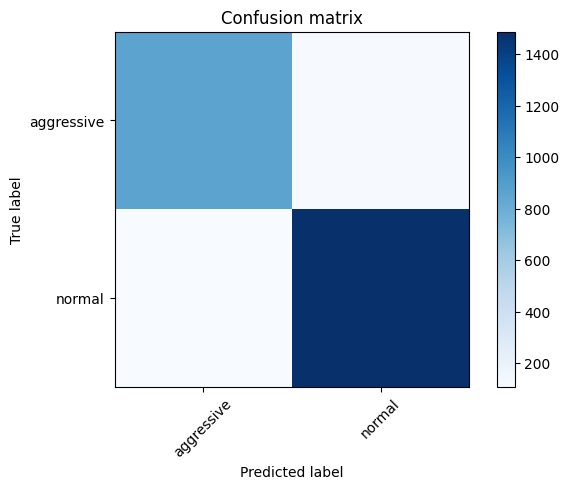

In [84]:
# Compute confusion matrix
cm = confusion_matrix(agg_y_test_day10, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, category)
plt.show()